# Dense를 이용한 신경망 구성

In [2]:
# 회귀분석
from keras.models import Sequential # keras models 서브패키지
from keras.layers import Dense      # layers => 모델구성
from sklearn.datasets import make_regression
# 신경망 - 정규화
from sklearn.preprocessing import MinMaxScaler

X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1) # X = 100x2, y = 100
scalarX, scalarY = MinMaxScaler(), MinMaxScaler() # data 값의 범위가 다르므로 Minmax 두 번 사용
scalarX.fit(X)
scalarY.fit(y.reshape(100,1)) # y는 열로 나오기 때문에 행으로 변형
X = scalarX.transform(X)
y = scalarY.transform(y.reshape(100, 1))
# keras model 시작
# 망만 생성 100x2
model = Sequential()
# dense : FFNN
model.add(Dense(4, input_dim=2, activation='relu')) # 4 : 출력 차수 , 가중치(2x4) => 100x4
# layer depth 1
model.add(Dense(4, activation='relu')) # 100x4 가중치(4x4) => 100x4 
# layer depth 2
model.add(Dense(1, activation='linear')) # 100x4 가중치(4x1) => 100x1, 예측
# layer depth 3
# 전 layer에서 계산된 것이 다음 layer에서 적용

# backend가 tensorflow
# loss : mse(회귀), cross enthropy, KL-divergence(GAN) : 분포를 비교
model.compile(loss='mse', optimizer='adam') # tensorflow 모델로 변환
model.fit(X, y, epochs=1000, verbose=0) # tensorflow에서 minimize는 for문 두개 첫번쨰는 epoch 두번째는 batch_size-> 이걸 한번에 하는 함수
# verbose = 학습 중 출력되는 문구를 설정합니다.
# - 0 : 아무 것도 출력하지 않습니다.
# - 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.
# - 2 : 미니 배치마다 손실 정보를 출력합니다.
Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
Xnew = scalarX.transform(Xnew)
ynew = model.predict(Xnew)
for i in range(len(Xnew)) :
    print("입력데이터 = %s, 예측결과 = %s" %(Xnew[i], ynew[i]))

입력데이터 = [0.29466096 0.30317302], 예측결과 = [0.1732434]
입력데이터 = [0.39445118 0.79390858], 예측결과 = [0.74460006]
입력데이터 = [0.02884127 0.6208843 ], 예측결과 = [0.40308127]


In [3]:
from keras.models import Sequential # input, output 하나
from keras.layers import Dense
import numpy as np
np.random.seed(7)
dataset = np.loadtxt("pima.data", delimiter=',')
X = dataset[:, 0:8] # 8개 독립변수
Y = dataset[:,8]    # 9번째 종속변수
model = Sequential()
# model.add(Dense(12, input_dim=8, activation='relu'))# ?x8 가중치(8x12) =>?x12
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu')) # 균등분포로 초기화
model.add(Dense(8, activation='relu'))# ?x12 가중치(12x8) => ?x8
model.add(Dense(1, activation='sigmoid'))# ?x8 가중치(8x1) => ?x1 sigmoid(분류, 0.5보다 크면 1 작으면 0)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # metrics=['accuracy'] 정확성을 측정하겠다.
# model.fit(X, Y, epochs=150, batch_size=10)
# history = model.fit(X, Y, epochs=150, batch_size=10) # history로 return
# 데이터 분리 입력(train, test) : 과적합
# train, validation, test
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10)
scores = model.evaluate(X,Y)
# 2번째 accuracy
print("\n%s : %.2f%%" %(model.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 613us/step - loss: 0.6906 - accuracy: 0.6576 - val_loss: 0.6552 - val_accuracy: 0.6693
Epoch 2/150
514/514 [==============================] - 0s 97us/step - loss: 0.6566 - accuracy: 0.6304 - val_loss: 0.6302 - val_accuracy: 0.6614
Epoch 3/150
514/514 [==============================] - 0s 93us/step - loss: 0.6429 - accuracy: 0.6304 - val_loss: 0.6340 - val_accuracy: 0.6654
Epoch 4/150
514/514 [==============================] - 0s 91us/step - loss: 0.6339 - accuracy: 0.6420 - val_loss: 0.6258 - val_accuracy: 0.6654
Epoch 5/150
514/514 [==============================] - 0s 93us/step - loss: 0.6251 - accuracy: 0.6595 - val_loss: 0.6293 - val_accuracy: 0.6654
Epoch 6/150
514/514 [==============================] - 0s 85us/step - loss: 0.6235 - accuracy: 0.6537 - val_loss: 0.6131 - val_accuracy: 0.

Epoch 55/150
514/514 [==============================] - 0s 93us/step - loss: 0.5561 - accuracy: 0.6887 - val_loss: 0.6058 - val_accuracy: 0.6890
Epoch 56/150
514/514 [==============================] - 0s 93us/step - loss: 0.5647 - accuracy: 0.6693 - val_loss: 0.5910 - val_accuracy: 0.6890
Epoch 57/150
514/514 [==============================] - 0s 93us/step - loss: 0.5625 - accuracy: 0.6984 - val_loss: 0.5770 - val_accuracy: 0.7008
Epoch 58/150
514/514 [==============================] - 0s 95us/step - loss: 0.5533 - accuracy: 0.6965 - val_loss: 0.6059 - val_accuracy: 0.6693
Epoch 59/150
514/514 [==============================] - 0s 95us/step - loss: 0.5601 - accuracy: 0.6887 - val_loss: 0.5985 - val_accuracy: 0.7008
Epoch 60/150
514/514 [==============================] - 0s 95us/step - loss: 0.5540 - accuracy: 0.6868 - val_loss: 0.5823 - val_accuracy: 0.6969
Epoch 61/150
514/514 [==============================] - 0s 95us/step - loss: 0.5593 - accuracy: 0.6848 - val_loss: 0.5714 - val_ac

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


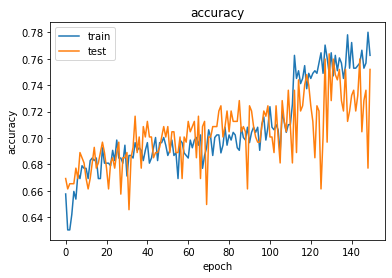

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

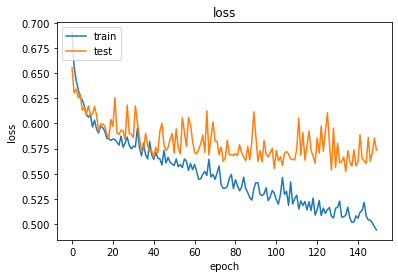

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

# 비선형

In [6]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.5)

In [7]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1000, 2)
(1000,)
(500, 2)
(500, 2)
(500,)
(500,)


[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'binary classification')]

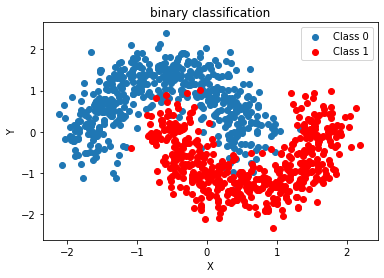

In [8]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label = 'Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label = 'Class 1')
ax.legend()
ax.set(xlabel='X', ylabel='Y', title='binary classification')

In [9]:
# 비선형모델 - 신경망 
import keras
model = Sequential()
# 행렬연산 => 설명을 확대 (변수 32-설명)
# 가중치가 있으면 바이어스도 있음
# 1000x2 가중치(2x32=64)+32(bias) = 96 => 1000x32
model.add(Dense(32, input_dim=2, activation='relu')) # 차원 확대
# 1000x32 32x1=32+1(bias)=33 =>1000x1 분류
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='AdaDelta', loss='binary_crossentropy', metrics=['accuracy'])

# callback 함수는 window에서 자동으로 호출되는 함수
tb_callback = keras.callbacks.TensorBoard(log_dir='./Graph/model_1/', histogram_freq=100, write_graph=True, write_images=False)
# graph 이미지 출력
tb_callback.set_model(model) # 콜백을 모델에 등록

In [10]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=200, verbose = 0, 
                 validation_data=(X_test, Y_test), callbacks=[tb_callback]) # 호출

In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss : ", score[0])
print("Test accuracy : ", score[1])

Test loss :  0.12789358568191528
Test accuracy :  0.949999988079071


In [12]:
keras.utils.print_summary(model)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


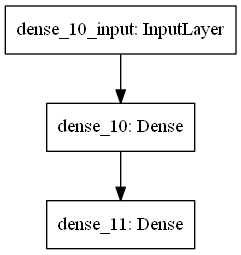

In [13]:
from keras.utils import plot_model
keras.utils.plot_model(model)

In [14]:
%matplotlib inline
from keras.utils.vis_utils import model_to_dot
model_to_dot(model)

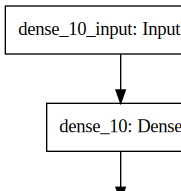

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [16]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Callback class
# custom callback 함수의 제작
# 함수에 의해서 호출되는 객체
class CustomHistory(keras.callbacks.Callback) : # 상속
    def init(self) : #__init__이 아니므로 호출가능
        self.train_loss = []
        self.val_loss=[]
        self.train_acc = []
        self.val_acc = []
    def on_epoch_end(self, batch, logs={}) :  # 오버라이딩
        self.train_loss.append(logs.get("loss"))
        self.val_loss.append(logs.get("val_loss"))
        self.train_loss.append(logs.get("accuracy"))
        self.val_loss.append(logs.get("val_accuracy"))

In [18]:
from keras.datasets import mnist
import matplotlib.pylab as plt
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


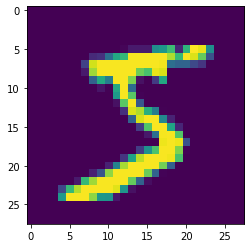

In [19]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show()

In [20]:
# fully-connected : flatten -> FFNN은 데이터가 1줄로 들어가야함
# 이미지 정규화  : 0~255 컬러값 / 255 => 0~1
X_train = X_train0.reshape(60000, 784).astype('float32')/255.0
X_test = X_test0.reshape(10000, 784).astype('float32')/255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


In [21]:
y_train0[:5] # one-hot encoding 여부 
#        => 전진망에서 분류는 softmax로, multi-label(binary_entropy) => softmax(3개가 넘어가면 사용,경우의 수에 대한 확률값)
# 5, 0, 4, 1, 9 -> 안되어 있음

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
# one-hot encoding
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [23]:
from keras.optimizers import SGD
np.random.seed(0)
model = Sequential()
# 60000x784 784x15 => 60000x15
model.add(Dense(15, input_dim=784, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
# lr : learning rate
# stochastic gradient descent
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [24]:
model.layers

In [25]:
l1 = model.layers[0]
l2 = model.layers[1]
# 레이어 속성으로 정보확인
l1.name
l1.input_shape
l1.output_shape
l1.activation

<function keras.activations.sigmoid(x)>

C:\Users\ICT01_21\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 0.1019 - accuracy: 0.2440 - val_loss: 0.0864 - val_accuracy: 0.3212
Epoch 2/30
 - 0s - loss: 0.0845 - accuracy: 0.3921 - val_loss: 0.0821 - val_accuracy: 0.4409
Epoch 3/30
 - 0s - loss: 0.0796 - accuracy: 0.4997 - val_loss: 0.0765 - val_accuracy: 0.5340
Epoch 4/30
 - 1s - loss: 0.0740 - accuracy: 0.5620 - val_loss: 0.0707 - val_accuracy: 0.5852
Epoch 5/30
 - 1s - loss: 0.0682 - accuracy: 0.6149 - val_loss: 0.0649 - val_accuracy: 0.6522
Epoch 6/30
 - 1s - loss: 0.0625 - accuracy: 0.6759 - val_loss: 0.0594 - val_accuracy: 0.6998
Epoch 7/30
 - 1s - loss: 0.0576 - accuracy: 0.7101 - val_loss: 0.0551 - val_accuracy: 0.7316
Epoch 8/30
 - 1s - loss: 0.0537 - accuracy: 0.7325 - val_loss: 0.0516 - val_accuracy: 0.7485
Epoch 9/30
 - 1s - loss: 0.0505 - accuracy: 0.7474 - val_loss: 0.0486 - val_accuracy: 0.7639
Epoch 10/30
 - 1s - loss: 0.0478 - accuracy: 0.7609 - val_loss: 0.0461 - val_accuracy: 0.7759
Epoch 11/30
 - 1s -

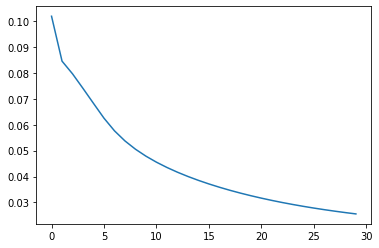

In [26]:
custom_hist = CustomHistory()
custom_hist.init()
hist = model.fit(X_train, Y_train, nb_epoch = 30, batch_size=100,
                validation_data=(X_test, Y_test), callbacks=[custom_hist], verbose=2)
plt.plot(hist.history['loss'])
plt.show()

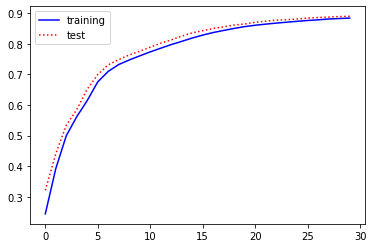

{'batch_size': 100, 'epochs': 30, 'steps': None, 'samples': 60000, 'verbose': 2, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0.24401666, 0.39213333, 0.49971667, 0.56201667, 0.6149167, 0.6759167, 0.7101333, 0.7325, 0.7474167, 0.76085, 0.77395, 0.7858833, 0.79766667, 0.8082833, 0.81918335, 0.82878333, 0.83713335, 0.84403336, 0.8506333, 0.85646665, 0.8609667, 0.8646167, 0.86795, 0.87091666, 0.87381667, 0.87651664, 0.8786833, 0.88136667, 0.8829, 0.8844]
0.8903999924659729


In [27]:
plt.plot(hist.history['accuracy'], 'b-', label='training')
plt.plot(hist.history['val_accuracy'], 'r:', label='test')
plt.legend()
plt.show()

print(hist.model)
print("=====================================================================")
print(hist.params)
print("=====================================================================")
print(hist.history['accuracy'])
print("=====================================================================")
print(hist.history['val_accuracy'][29])

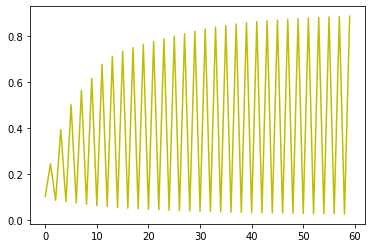

In [56]:
plt.plot(custom_hist.train_loss, 'y', label = 'train loss')
plt.show()

# 문제 :  X_test의 이미지 한장의 label을 예측해보시요

In [29]:
model.predict(X_test[:1,:])

array([[0.01766995, 0.01917326, 0.01319781, 0.02869663, 0.01251969,
        0.05721784, 0.01232019, 0.9418675 , 0.00762815, 0.0553683 ]],
      dtype=float32)

In [30]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7], dtype=int64)

# 문제 : 출력차수가 512인 레이어를 추가하시요

In [31]:
np.random.seed(0)
model = Sequential()

model.add(Dense(512, input_dim=784, activation = 'sigmoid'))
model.add(Dense(15, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))

model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [32]:
model.layers

In [33]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
#404x13,  404        102x13,  102

In [34]:
print(x_train.shape) 
print(y_train.shape)

(404, 13)
(404,)


In [43]:
model = Sequential()
num_features = 13
model.add(Dense(1, input_dim=num_features, activation='linear'))

In [44]:
model.summary()
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
404/404 [==============================] - 0s 764us/step - loss: 2977.5459 - mae: 45.4587
Epoch 2/10
404/404 [==============================] - 0s 469us/step - loss: 676.9890 - mae: 20.8535
Epoch 3/10
404/404 [==============================] - 0s 528us/step - loss: 148.5185 - mae: 9.0344
Epoch 4/10
404/404 [==============================] - 0s 511us/step - loss: 95.2050 - mae: 6.9051
Epoch 5/10
404/404 [==============================] - 0s 517us/step - loss: 94.3843 - mae: 6.8719
Epoch 6/10
404/404 [==============================] - 0s 495us/step - loss: 87.6658 - mae: 6.4900
Epoch 7/10
404/404 [==============================] - 0s 5

In [45]:
# accuracy
mse, mae = model.evaluate(x_test, y_test, verbose=False)
rmse=np.sqrt(mse)
mse, rmse, mae

(65.86399063409543, 8.115663289842391, 5.88503360748291)

# 문제 : x_test의 앞의 3집을 예측

In [46]:
pred = model.predict(x_test[:3, :])
pred

array([[-0.76433164],
       [24.714075  ],
       [19.784174  ]], dtype=float32)

In [47]:
real = y_test[:3]
real

array([ 7.2, 18.8, 19. ])

# 상관계수를 확인하시요

In [58]:
print(pred.shape)
print(real.shape)

(3, 1)
(3,)


In [59]:
import numpy as np
np.corrcoef(pred.reshape(1,3), real)

array([[1.        , 0.98041556],
       [0.98041556, 1.        ]])

In [1]:
# scikits -- keras를 연결 : KerasClassifier, KerasRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.
C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_22\Anaconda3\envs

In [2]:
# 768x9 => 768,8 독립   768,1 종속
# 변수 8 
def create_model() :
    model = Sequential()
    # 768x8  8x12 => 768x12
    model.add(Dense(12, input_dim=8, activation='relu'))
    # 768x12  12x1=> 768x1
    model.add(Dense(1, activation='sigmoid')) # 0~1
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
seed=7
np.random.seed(seed)
dataset = np.loadtxt('pima.csv', delimiter=',')
X=dataset[:,0:8]
Y=dataset[:,8]
model = KerasClassifier(build_fn=create_model, verbose=0)

In [3]:
dataset.shape

(768, 9)

In [4]:
# 파라미터 조합
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
# 매개변수 입력 형태는 dictionary
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator = model, param_grid=param_grid, n_jobs = -1) # 참여하는 cpu 개수 -1은 다 참가해라
grid_result = grid.fit(X,Y)
print("최적스코어 : %f       사용한 파라미터조합 : %s" %(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params) :
    print("%f (%f) with %r" %(mean, stdev, param))

C:\Users\ICT01_22\Anaconda3\envs\tf_test\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

최적스코어 : 0.705797       사용한 파라미터조합 : {'batch_size': 20, 'epochs': 100}
0.605365 (0.062269) with {'batch_size': 10, 'epochs': 10}
0.673288 (0.061546) with {'batch_size': 10, 'epochs': 50}
0.696605 (0.006997) with {'batch_size': 10, 'epochs': 100}
0.630329 (0.048038) with {'batch_size': 20, 'epochs': 10}
0.661506 (0.020640) with {'batch_size': 20, 'epochs': 50}
0.705797 (0.038857) with {'batch_size': 20, 'epochs': 100}
0.557202 (0.042193) with {'batch_size': 40, 'epochs': 10}
0.615907 (0.056513) with {'batch_size': 40, 'epochs': 50}
0.687463 (0.026520) with {'batch_size': 40, 'epochs': 100}
0.562516 (0.076147) with {'batch_size': 60, 'epochs': 10}
0.623716 (0.030884) with {'batch_size': 60, 'epochs': 50}
0.686224 (0.024188) with {'batch_size': 60, 'epochs': 100}
0.497428 (0.059458) with {'batch_size': 80, 'epochs': 10}
0.614574 (0.021636) with {'batch_size': 80, 'epochs': 50}
0.661480 (0.027004)

가중치 초기화 (kernel_initializer) 매개변수를 넣고 이름

['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal',
'glorot_uniform', 'he_normal', 'he_uniform']

로 테스트 해서 가장 최적의 가중치 초기화 파라미터를 결정하시오.

- dense1 : activation 함수를 달아주고

['softmax', 'softplus', 'softsign', 'relu', 'tanh',
'sigmoid', 'hard_sigmoid', 'linear']

의 조합중 가장 좋은 activation 함수를 결정하시오.

In [ ]:
init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# ?x8 8x12 => ?x12 
# kernel_initializer='uniform': 우리도 모르는 가중치를 초기화 (균등분포로)
model.add(Dense(12, input_dim=8, kernel_initializer=init, activation = 'relu'))
# ?x12 12x8 => ?x8
model.add(Dense(8, kernel_initializer='uniform', activation = 'relu'))
# ?x8 8x1 => ?x1
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) # sigmoid: 0.5를 기준으로 (0, 1)
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])